<a href="https://colab.research.google.com/github/mohammedsallahh/course/blob/main/Hierarchical_Clustering_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [2]:
#read the data

data_path = '/content/countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find**

In [3]:
df = pd.read_csv(data_path, decimal=",",thousands=".")

In [4]:
df.head(100)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,52.0,11.32,7.23,81.45,2.0,20.34,6.25,0.134,0.458,0.408
96,Iran,ASIA (EX. NEAR EAST),68688433,1648000,41.7,0.15,-0.84,41.58,7000.0,79.4,276.4,8.72,1.39,89.89,1.0,17.00,5.55,0.116,0.424,0.460
97,Iraq,NEAR EAST,26783383,437072,61.3,0.01,0.00,50.25,1500.0,40.4,38.6,13.15,0.78,86.07,1.0,31.98,5.37,0.073,0.666,0.261
98,Ireland,WESTERN EUROPE,4062235,70280,57.8,2.06,4.99,5.39,29600.0,98.0,500.5,15.20,0.03,84.77,3.0,14.45,7.82,0.050,0.460,0.490


In [5]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [6]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [7]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- There are missing value in the data          <br>
2- there are a NAN          <br>
3-           <br>

In [8]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [9]:
#solution
df_copy=df_copy.dropna(how='any')

In [10]:
#test
df_copy

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Venezuela,LATIN AMER. & CARIB,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
219,Vietnam,ASIA (EX. NEAR EAST),84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


**Second issue**

In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             179 non-null    object 
 1   Region                              179 non-null    object 
 2   Population                          179 non-null    int64  
 3   Area (sq. mi.)                      179 non-null    int64  
 4   Pop. Density (per sq. mi.)          179 non-null    float64
 5   Coastline (coast/area ratio)        179 non-null    float64
 6   Net migration                       179 non-null    float64
 7   Infant mortality (per 1000 births)  179 non-null    float64
 8   GDP ($ per capita)                  179 non-null    float64
 9   Literacy (%)                        179 non-null    float64
 10  Phones (per 1000)                   179 non-null    float64
 11  Arable (%)                          179 non-n

In [12]:
#solution
df_copy1=df_copy.drop(columns=['Country', 'Region'])

In [13]:
#test
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 226
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Population                          179 non-null    int64  
 1   Area (sq. mi.)                      179 non-null    int64  
 2   Pop. Density (per sq. mi.)          179 non-null    float64
 3   Coastline (coast/area ratio)        179 non-null    float64
 4   Net migration                       179 non-null    float64
 5   Infant mortality (per 1000 births)  179 non-null    float64
 6   GDP ($ per capita)                  179 non-null    float64
 7   Literacy (%)                        179 non-null    float64
 8   Phones (per 1000)                   179 non-null    float64
 9   Arable (%)                          179 non-null    float64
 10  Crops (%)                           179 non-null    float64
 11  Other (%)                           179 non-n

In [26]:
df_copy2=df_copy1.astype(int)

In [28]:
df_copy2.shape

(179, 18)

<bound method Series.info of Population                            int64
Area (sq. mi.)                        int64
Pop. Density (per sq. mi.)            int64
Coastline (coast/area ratio)          int64
Net migration                         int64
Infant mortality (per 1000 births)    int64
GDP ($ per capita)                    int64
Literacy (%)                          int64
Phones (per 1000)                     int64
Arable (%)                            int64
Crops (%)                             int64
Other (%)                             int64
Climate                               int64
Birthrate                             int64
Deathrate                             int64
Agriculture                           int64
Industry                              int64
Service                               int64
dtype: object>

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [22]:
from sklearn import preprocessing
from sklearn.preprocessing import normalize


In [29]:
X_normalized = preprocessing.normalize(df_copy2, norm='l2')

X_normalized

array([[9.99782735e-01, 2.08442343e-02, 1.54520964e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99966999e-01, 8.02619216e-03, 3.46197241e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.97394592e-01, 7.21387194e-02, 3.93747157e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99697387e-01, 2.45994409e-02, 1.86369990e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.97866092e-01, 6.52936305e-02, 1.30133702e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99490983e-01, 3.19022153e-02, 2.53205150e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [30]:
X_normalized.shape

(179, 18)

## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance
    - Manhattan Distance
    - Mahalanobis distance
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [38]:
import scipy.cluster.hierarchy as shc

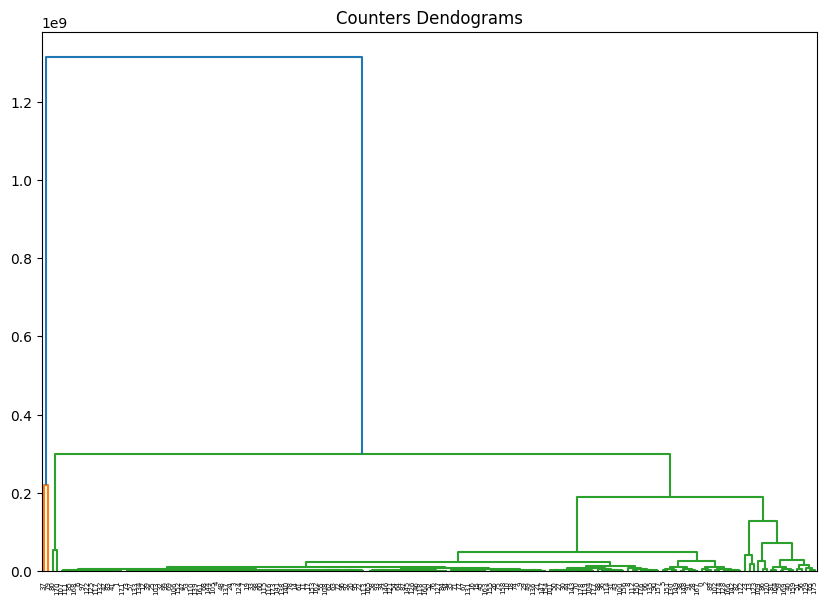

In [40]:
plt.figure(figsize=(10, 7))                                                                              #fill y with your dataframe
plt.title("Counters Dendograms")                                                                        #and method with linkage criteria
dend = shc.dendrogram(shc.linkage(y=df_copy2 , method='complete',metric='euclidean'),orientation='top') #and metric with distance function

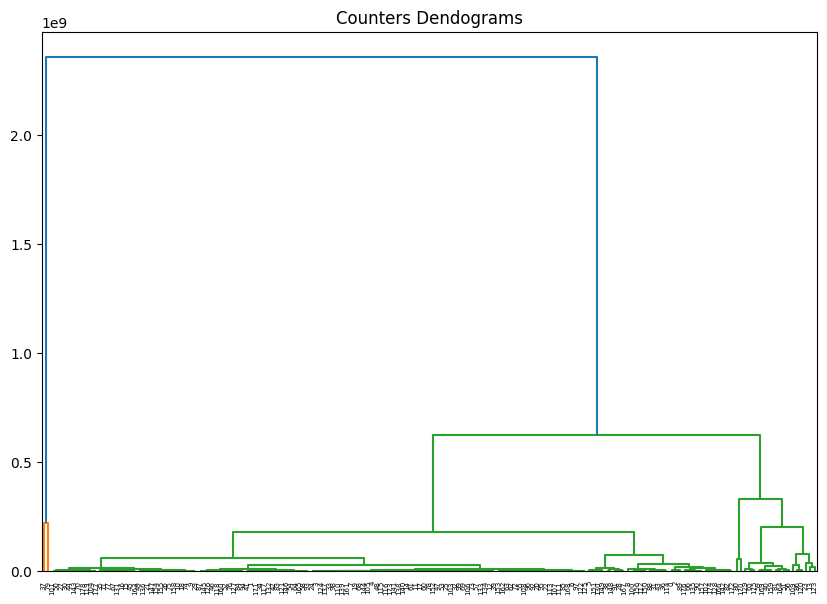

In [41]:
plt.figure(figsize=(10, 7))                                                                              #fill y with your dataframe
plt.title("Counters Dendograms")                                                                        #and method with linkage criteria
dend = shc.dendrogram(shc.linkage(y=df_copy2 , method='ward',metric='euclidean'),orientation='top') #and metric with distance function

In [45]:
#training
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [48]:
score=AgglomerativeClustering(n_clusters=3,linkage='average')
pred=score.fit_predict(df_copy2)
score_1=silhouette_score(df_copy2,pred)
print (score_1)

0.9592259205515277


## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method